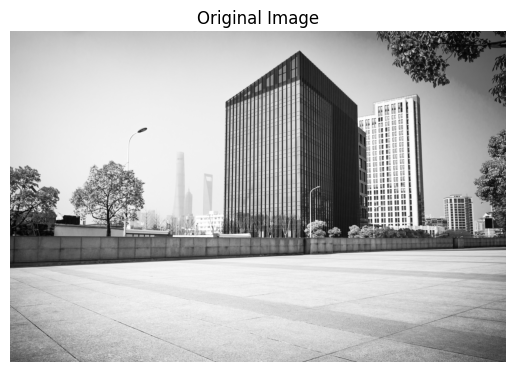

In [17]:
import cv2
import matplotlib.pyplot as plt
import pywt
import numpy as np





# Load image in grayscale
# Check if the image path is correct and the file exists
image_path = '/content/img1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path and permissions.")
else:
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

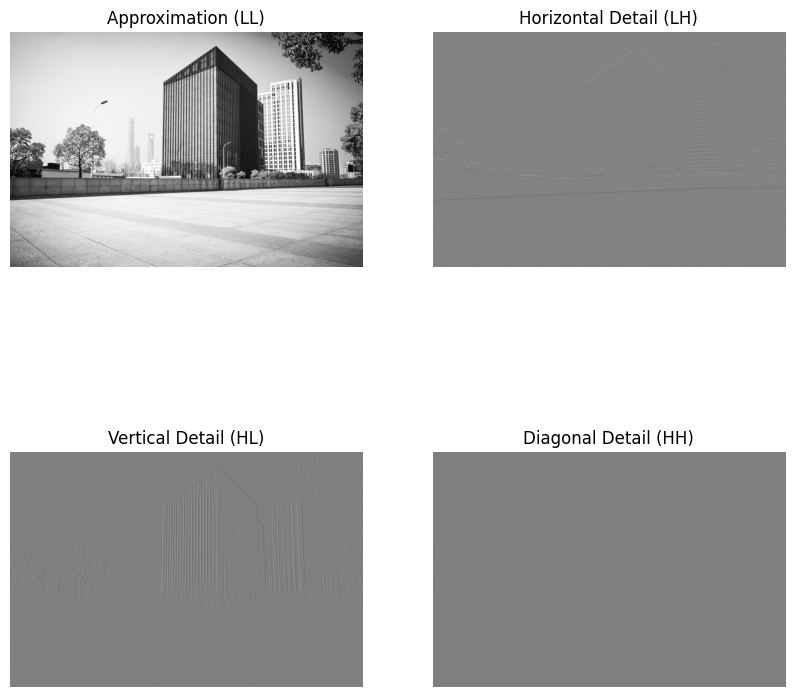

In [18]:

# Perform 2D Wavelet Decomposition using Haar wavelet
coeffs2 = pywt.dwt2(image, 'haar')
LL, (LH, HL, HH) = coeffs2

# Visualize decomposed components
titles = ['Approximation (LL)', 'Horizontal Detail (LH)',
          'Vertical Detail (HL)', 'Diagonal Detail (HH)']
components = [LL, LH, HL, HH]

plt.figure(figsize=(10, 10))
for i, comp in enumerate(components):
    plt.subplot(2, 2, i + 1)
    plt.imshow(comp, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


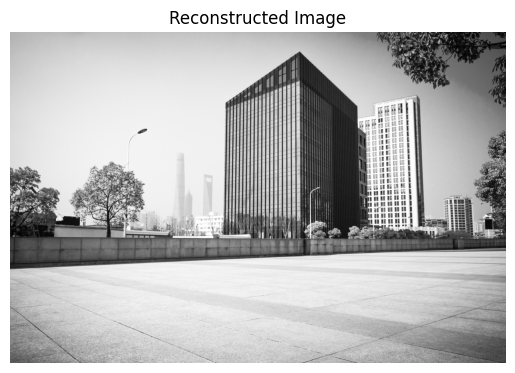

In [14]:
# Reconstruct the image from wavelet coefficients
reconstructed_image = pywt.idwt2(coeffs2, 'haar')

# Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


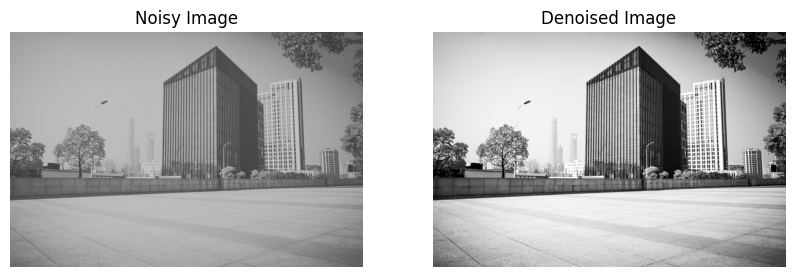

In [16]:

# Add Gaussian noise to the image
noisy_image = image + np.random.normal(0, 25, image.shape)


# ... (previous code) ...
LL, (LH, HL, HH) = coeffs2

# Thresholding for denoising (Modified)
LL, (LH, HL, HH) = coeffs2

# Threshold each component individually
LL_denoised = pywt.threshold(LL, 25, mode='soft', substitute=0)
LH_denoised = pywt.threshold(LH, 25, mode='soft', substitute=0)
HL_denoised = pywt.threshold(HL, 25, mode='soft', substitute=0)
HH_denoised = pywt.threshold(HH, 25, mode='soft', substitute=0)


# Reconstruct the denoised coefficients tuple
denoised_coeffs = (LL_denoised, (LH_denoised, HL_denoised, HH_denoised))

# Inverse transform the denoised coefficients
denoised_image = pywt.idwt2(denoised_coeffs, 'haar')



# Visualize noisy and denoised images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')
plt.show()
